In [1]:
# import classy module
from classy import Class

In [2]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [3]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

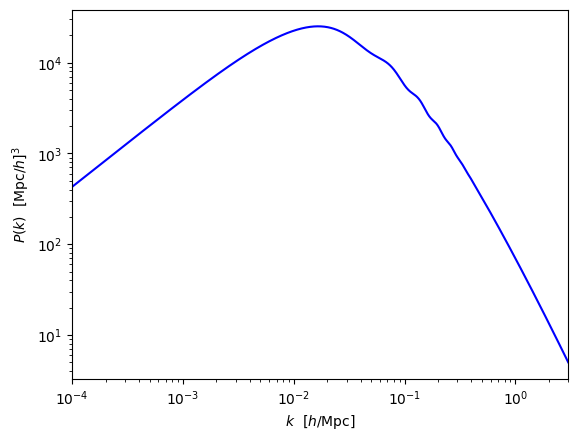

In [4]:
import matplotlib.pyplot as plt
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')

In [5]:
mpk=np.array([kk,Pk]).T
np.savetxt('kk.dat',mpk)

In [6]:
from cluster_toolkit import massfunction
import numpy as np
import matplotlib.pyplot as plt
mpk = np.genfromtxt(r'/home/satvik/Desktop/CLASS_3/class_public/notebooks/kk.dat')
#Units of k and P are h/Mpc and (Mpc/h)^3
kk=mpk[:,0]
Pk=mpk[:,1]
Omega_m = 0.3 #example value
Masses = np.logspace(7, 15)
dndM = massfunction.dndM_at_M(Masses, kk, Pk, Omega_m)

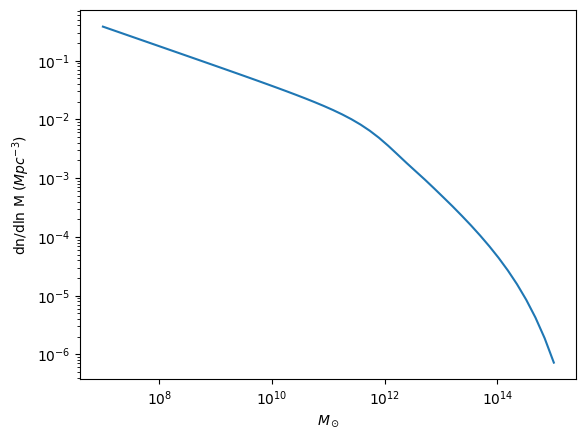

In [7]:
plt.plot(Masses,dndM*Masses)
plt.ylabel('dn/dln M $(Mpc^{-3})$')
plt.xlabel('$M_\odot$')
plt.yscale('log')
plt.xscale('log')

In [9]:
# edges=np.logspace(7,15,100)
edges = np.array([1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e15])
n = massfunction.n_in_bins(edges, Masses, dndM)
norm_n = n/sum(n)

n_mass=1000
s=[]
for i in range(n_mass):
    s.append(np.random.choice(np.arange(0,7), p=norm_n))
    
mass_list=np.zeros(n_mass)
for i in range(n_mass):
    mass_list[i]= np.random.uniform(edges[s[i]],edges[s[i]+1])